# Medicotask - resnet50

# Medicodataset 70-30

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = "../../../data/data_generated_medicotask_70_30_v2/"
sz= 224 #64 # changed to 64 - 64X64 is good for satalite image analysis, Why? to study
arch=resnet50
bs=64

In [6]:
os.listdir(PATH)

['test',
 'keras_history',
 'pytorch_plots',
 'pytorch_gpu_info',
 'validation',
 'keras_plots',
 'pytorch_models',
 'mxnet_models',
 'keras_gpu_info',
 'tmp',
 'mxnet_history',
 'models',
 'pytorch_history',
 'mxnet_plots',
 'keras_models',
 'train']

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4, val_name='validation')
learn = ConvLearner.pretrained(arch, data)

/home/vajira/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/vajira/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


 97%|█████████▋| 56/58 [00:17<00:00,  3.19it/s, loss=17.4]

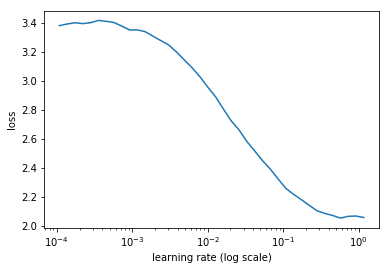

In [8]:
lrf=learn.lr_find()
learn.sched.plot()

In [9]:
lr = 0.2

In [10]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.11614    0.427328   0.845865  
    1      0.883457   0.39491    0.863409                  
    2      0.589011   0.30894    0.891604                  
    3      0.550269   0.344567   0.874687                  
    4      0.493243   0.313301   0.892231                  
    5      0.392023   0.270407   0.901629                  
    6      0.296145   0.263677   0.899749                  
    7      0.31307    0.316991   0.880952                  
    8      0.368959   0.334881   0.882832                  
    9      0.36823    0.288616   0.89411                   
    10     0.300615   0.272179   0.905388                  
    11     0.254364   0.268958   0.902882                  
    12     0.227545   0.242414   0.906642                  
    13     0.207783   0.240533   0.909148                  
    14     0.197011   0.236224   0.910401                  


[0.2362237602173535, 0.9104010042988866]

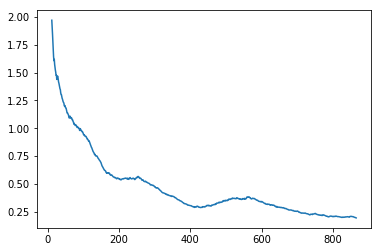

In [11]:
learn.sched.plot_loss()

In [13]:
lrs = np.array([lr/9,lr/3,lr])

In [14]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.35203    0.832877   0.692982  
    1      1.142265   0.72403    0.693609                 
    2      0.84404    0.553899   0.796992                  
    3      0.970236   4.285517   0.536967                  
    4      0.886349   0.760181   0.716165                  
    5      0.683095   0.42031    0.814536                  
    6      0.546013   0.383459   0.835213                  
    7      0.667394   0.943635   0.718672                  
    8      0.657535   0.744988   0.779449                  
    9      0.567007   0.439736   0.825188                  
    10     0.48786    0.359094   0.864662                  
    11     0.397761   0.555745   0.817043                  
    12     0.33644    0.279522   0.904762                  
    13     0.272759   0.279241   0.907268                  
    14     0.23995    0.270898   0.906642                  


[0.27089758362985195, 0.9066416047569504]

In [15]:
learn.save('7_1_fastai_resnet50_medico_15_classes_v1')

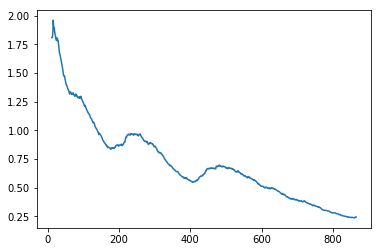

In [16]:
learn.sched.plot_loss()

In [ ]:
sz=128

In [ ]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [ ]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)


In [ ]:
learn.save('2_4_resnet34_kvasir_11_07_2018_v2')

In [ ]:
learn.load('2_4_resnet34_kvasir_11_07_2018_v2')

In [ ]:
sz=256
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [ ]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)
learn.save('2_4_resnet34_kvasir_12_07_2018_last')

In [ ]:
learn.sched.plot_loss()

In [17]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [18]:
accuracy_np(probs, y)

0.9078947368421053

## Analyzing results

### Confusion matrix 

In [19]:
preds = np.argmax(probs, axis=1)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [21]:
plt.rcParams['figure.figsize'] = [15, 10]

[[ 51   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 116  21   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   9 115   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0 107   0   0   0  27   0   0   0   0   0   0   0]
 [  0   0   0   0   2   4   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   0 120   0   0   0   4   0   0   0   0   1]
 [  0   0   0   0   0   0   0 132   0   0   0   0   0   0   0   0]
 [  0   0   0   0  27   0   0   1 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0]
 [  0   0   0   0   1   0  11   3   0   0 157   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   0   0   2  68   1   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   1 119   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 110 

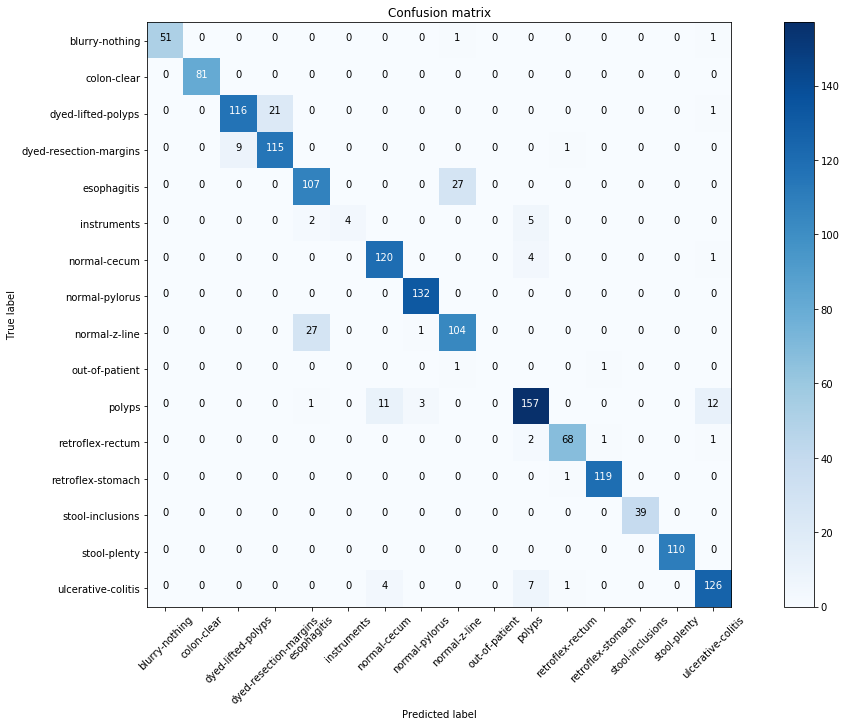

In [22]:
plot_confusion_matrix(cm, data.classes)

In [24]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, val_name='validation', num_workers=4)

In [25]:
log_preds_t,y_t = learn.TTA()

In [26]:
probs_t = np.mean(np.exp(log_preds_t),0)
accuracy_np(probs_t, y_t)

0.906641604010025

[[ 50   0   0   0   0   0   0   2   0   0   0   0   0   0   0   1]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 114  23   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   8 116   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0 108   0   0   0  26   0   0   0   0   0   0   0]
 [  0   0   0   0   2   4   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   0 120   0   0   0   4   0   0   0   0   1]
 [  0   0   0   0   0   0   0 132   0   0   0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   1 100   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0  10   3   0   0 159   0   0   0   0  11]
 [  0   0   0   0   0   0   0   0   0   0   1  68   1   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   1 119   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 110 

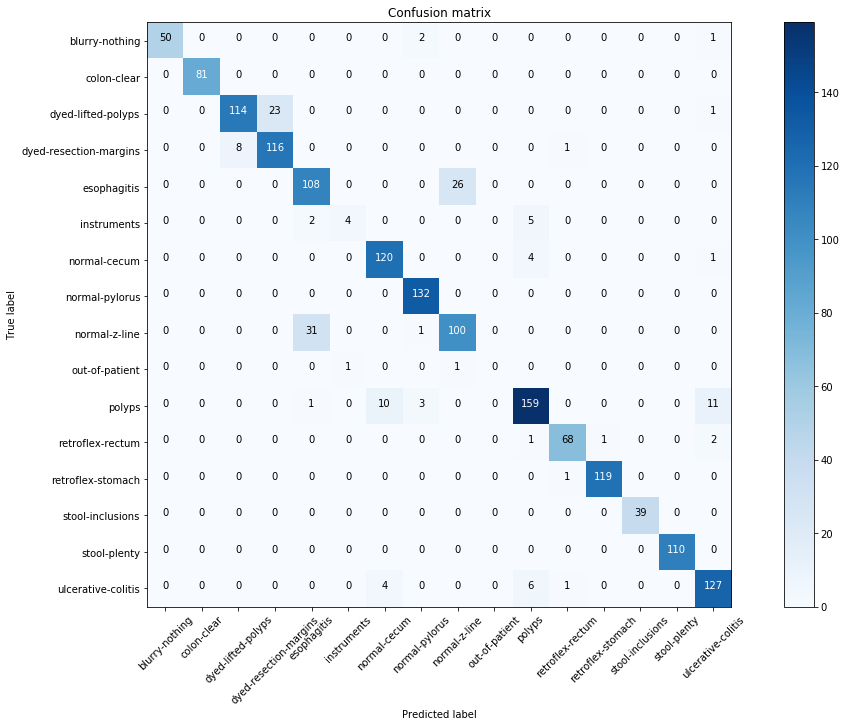

In [27]:
preds_t = np.argmax(probs_t, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, preds_t)
plot_confusion_matrix(cm, data.classes)